In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [28]:
img = image.load_img("class1/train/Dog/1.JPG")

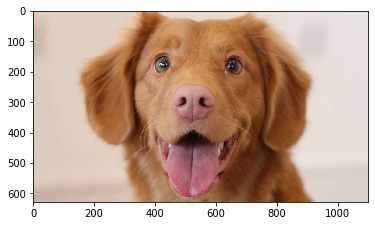

In [29]:
plt.imshow(img)

In [30]:
cv2.imread("class1/train/Dog/1.JPG").shape

(628, 1100, 3)

In [31]:
train = ImageDataGenerator(rescale = 1/255)

In [32]:
validation = ImageDataGenerator(rescale = 1/255)

In [33]:
train_dataset = train.flow_from_directory('class1/train/',
                                         target_size=(200,200),
                                         batch_size = 1,
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory('class1/validation/',
                                         target_size=(200,200),
                                         batch_size = 1,
                                         class_mode = 'binary')

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [34]:
train_dataset.labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [35]:
validation_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [36]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [39]:
model1 = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #                      
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])
model1.compile(loss='binary_crossentropy',optimizer = RMSprop(lr=0.001),metrics = ['accuracy'])

In [12]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',input_shape=(200,200,3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = RMSprop(lr=0.001),metrics = ['accuracy'])

In [40]:
model_fit = model1.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs= 30,
                     validation_data = validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 10 steps
Epoch 1/30
3/3 [==============================] - 1s 483ms/step - loss: 16.2100 - accuracy: 0.6667 - val_loss: 2.7392 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 1s 284ms/step - loss: 2.9957 - accuracy: 0.6667 - val_loss: 0.9472 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 1s 251ms/step - loss: 1.1728 - accuracy: 0.3333 - val_loss: 0.9821 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 1s 229ms/step - loss: 2.3044 - accuracy: 0.3333 - val_loss: 0.6697 - val_accuracy: 0.6000
Epoch 5/30
3/3 [==============================] - 1s 230ms/step - loss: 0.7125 - accuracy: 0.3333 - val_loss: 0.8608 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 1s 250ms/step - loss: 0.9343 - accuracy: 0.3333 - val_loss: 0.6590 - val_accuracy: 0.8000
Epoch 7/30
3/3 [==============================] - 1s 231ms/step - lo

In [41]:
dir_path = 'class1/test'

In [42]:
JJ = os.listdir(dir_path)[1:]

In [43]:
JJ

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', 'unnamed.png']

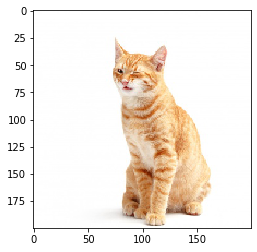

[[0.01528361]]
Cat


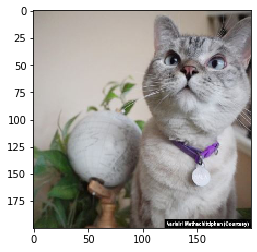

[[0.00137821]]
Cat


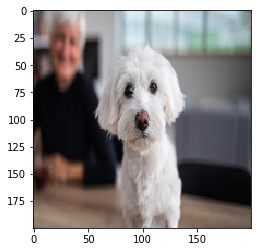

[[0.00015914]]
Cat


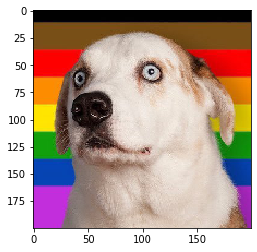

[[0.0014785]]
Cat


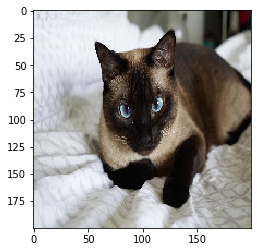

[[0.7737068]]
Dog


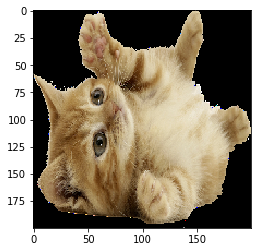

[[0.940603]]
Dog


In [44]:
for i in os.listdir(dir_path)[1:]:
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    #val = model.predict(images)
    print(val)
    if (val <= 0.5):
        print("Cat")
    else:
        print("Dog")

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 16)       